<a href="https://colab.research.google.com/github/Manav-Khandurie/Breast-Cancer-ML-Models/blob/main/BreastCancerMLModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast Cancer Prediction
This notebook contains code for all the models used for project

# Data Collection
The dataset used in this analysis is present at
https://www.kaggle.com/datasets/reihanenamdari/breast-cancer/code

In [ ]:
# Sample Code for Data PreProcessing

# Exploratory Data Analysis (EDA)


In [1]:
# Code logic for EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Assuming 'df' is your DataFrame
df = pd.read_csv("/content/sample_data/Breast_Cancer.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [4]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


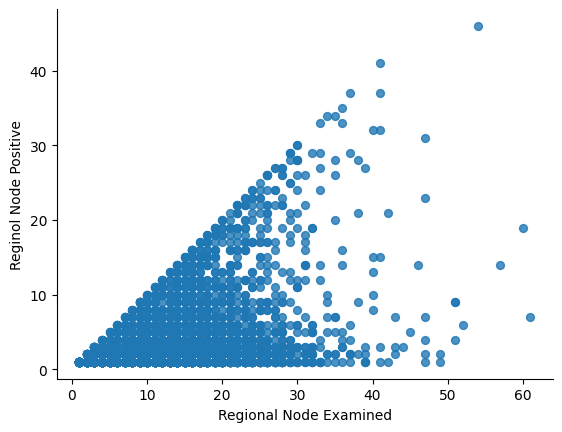

In [10]:

df.plot(kind='scatter', x='Regional Node Examined', y='Reginol Node Positive', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

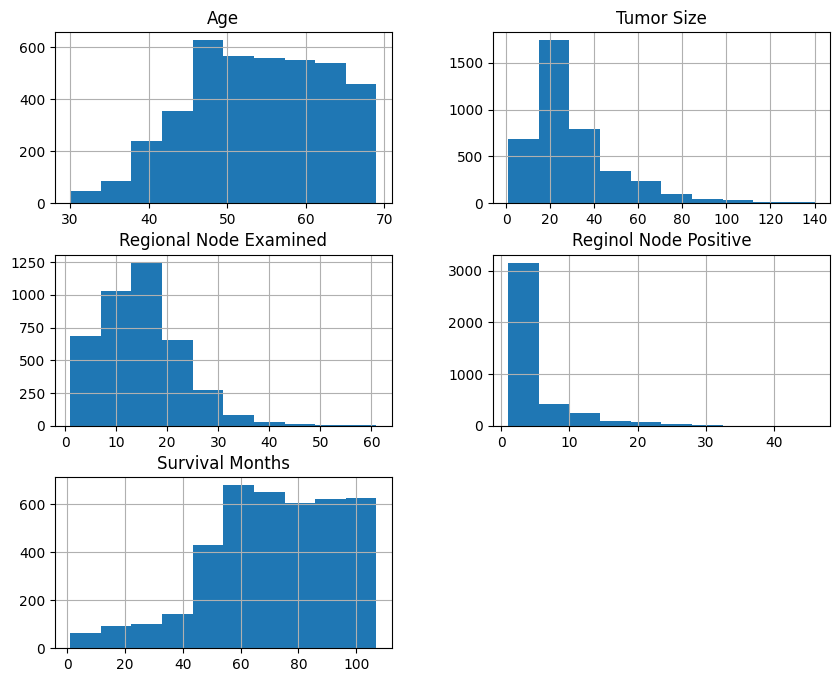

In [ ]:
df.hist(figsize=(10, 8))
plt.show()

<ipython-input-5-7b324e919061>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


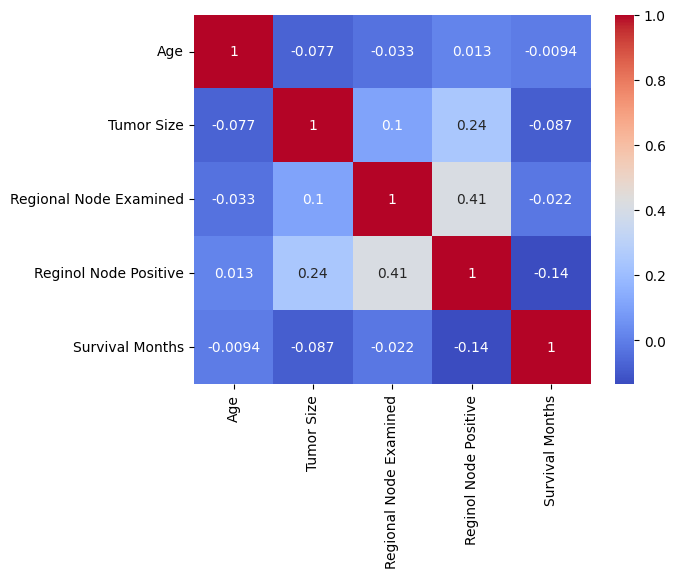

In [5]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

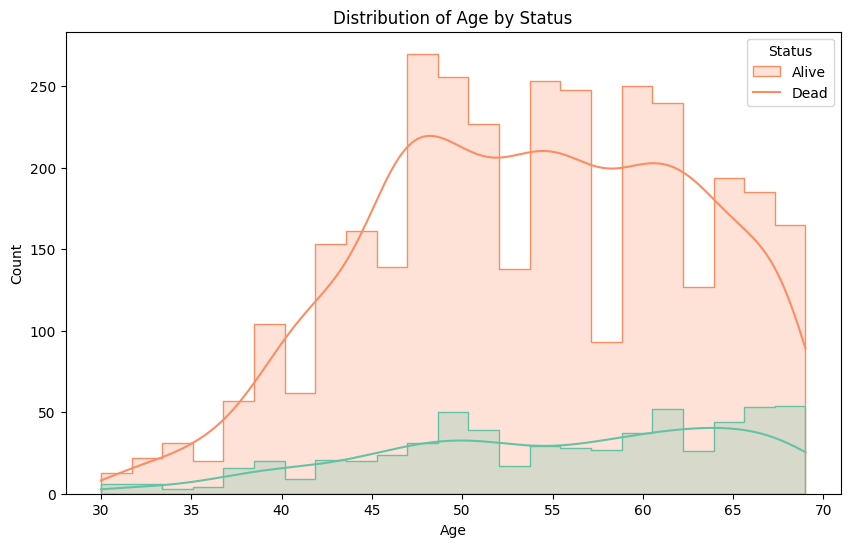

In [17]:
# Plot the distribution (histogram or kernel density estimate) for Age by Status
plt.figure(figsize=(10, 6))

sns.histplot(data=df, x='Age', hue='Status', kde=True, palette='Set2', element='step', common_norm=False)
plt.title('Distribution of Age by Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Status', labels=['Alive', 'Dead'])

plt.show()

# Data PreProcessing

We use the One-Hot Enchoding Technique

In [7]:
# Pre-processing steps
df.rename(columns={"T Stage ": "T Stage"}, inplace=True)
df["Grade"].replace({" anaplastic; Grade IV": "4"}, inplace=True)
df["Grade"] = df["Grade"].astype(int)
df["T Stage"].replace({"T1":1, "T2": 2, "T3":3, "T4": 4}, inplace=True)
df["N Stage"].replace({"N1":1, "N2": 2, "N3":3}, inplace=True)
df["6th Stage"].replace({"IIA":1, "IIB": 2, "IIIA":3, "IIIB": 4,"IIIC":5}, inplace=True)
df["differentiate"].replace({"Moderately differentiated": 2,
                            "Poorly differentiated": 1,
                            "Well differentiated": 3,
                            "Undifferentiated": 0}, inplace=True)
df["A Stage"].replace({"Regional":1, "Distant": 0}, inplace=True)
df["Estrogen Status"].replace({"Positive":1, "Negative": 0}, inplace=True)
df["Progesterone Status"].replace({"Positive":1, "Negative": 0}, inplace=True)
df["Status"].replace({"Alive":1, "Dead": 0}, inplace=True)

# Specify the columns to one-hot encode
columns_to_encode = ["Race", "Marital Status"]

# Perform one-hot encoding using pd.get_dummies()
df = pd.get_dummies(df, columns=columns_to_encode, dtype=int)

In [8]:
df.head()

,Age,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,...,Survival Months,Status,Race_Black,Race_Other,Race_White,Marital Status_Divorced,Marital Status_Married,Marital Status_Separated,Marital Status_Single,Marital Status_Widowed
0,68,1,1,1,1,3,1,4,1,1,...,60,1,0,0,1,0,1,0,0,0
1,50,2,2,3,2,2,1,35,1,1,...,62,1,0,0,1,0,1,0,0,0
2,58,3,3,5,2,2,1,63,1,1,...,75,1,0,0,1,1,0,0,0,0
3,58,1,1,1,1,3,1,18,1,1,...,84,1,0,0,1,0,1,0,0,0
4,47,2,1,2,1,3,1,41,1,1,...,50,1,0,0,1,0,1,0,0,0


from matplotlib import pyplot as plt
_df_0['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['T Stage'].plot(kind='hist', bins=20, title='T Stage')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['N Stage'].plot(kind='hist', bins=20, title='N Stage')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['6th Stage'].plot(kind='hist', bins=20, title='6th Stage')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Age', y='T Stage', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='T Stage', y='N Stage', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='N Stage', y='6th Stage', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='6th Stage', y='differentiate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['A Stage']
  ys = series['Age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('A Stage', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('A Stage')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['A Stage']
  ys = series['T Stage']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('A Stage', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('A Stage')
_ = plt.ylabel('T Stage')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['A Stage']
  ys = series['N Stage']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('A Stage', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('A Stage')
_ = plt.ylabel('N Stage')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['A Stage']
  ys = series['6th Stage']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('A Stage', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('A Stage')
_ = plt.ylabel('6th Stage')

from matplotlib import pyplot as plt
_df_12['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['T Stage'].plot(kind='line', figsize=(8, 4), title='T Stage')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['N Stage'].plot(kind='line', figsize=(8, 4), title='N Stage')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['6th Stage'].plot(kind='line', figsize=(8, 4), title='6th Stage')
plt.gca().spines[['top', 'right']].set_visible(False)

# Model Training

In [ ]:
# Sample code for Model Training

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score

# Load Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling for better model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initializing models after importing
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(random_state=42)
log_reg = LogisticRegression(max_iter=10000, random_state=42)
knn = KNeighborsClassifier()

# Training models
random_forest.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
log_reg.fit(X_train, y_train)
knn.fit(X_train, y_train)

# Predictions
rf_predictions = random_forest.predict(X_test)
xgb_predictions = xgb_model.predict(X_test)
log_reg_predictions = log_reg.predict(X_test)
knn_predictions = knn.predict(X_test)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print("Random Forest Recall:", recall_score(y_test, rf_predictions))

print("XGBoost Accuracy:", accuracy_score(y_test, xgb_predictions))
print("XGBoost Recall:", recall_score(y_test, xgb_predictions))

print("Logistic Regression Accuracy:", accuracy_score(y_test, log_reg_predictions))
print("Logistic Regression Recall:", recall_score(y_test, log_reg_predictions))

print("KNN Accuracy:", accuracy_score(y_test, knn_predictions))
print("KNN Recall:", recall_score(y_test, knn_predictions))

Random Forest Accuracy: 0.9649122807017544
Random Forest Recall: 0.9859154929577465
XGBoost Accuracy: 0.956140350877193
XGBoost Recall: 0.971830985915493
Logistic Regression Accuracy: 0.9736842105263158
Logistic Regression Recall: 0.9859154929577465
KNN Accuracy: 0.9473684210526315
KNN Recall: 0.9577464788732394


# Model Testing

In [ ]:
#Sample code for Model Testing

# Results & Observations

In [ ]:
# Sample Results